In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import shutil
import cv2
import os

In [2]:
df = pd.read_csv('size_Array_fs.csv', header=None, delimiter=",", usecols=None)

In [3]:
output_df = pd.DataFrame(columns = ['image_file', 'seen_data_numeric', 'size_used', 'closing_ssd', 'closing_eng', 'mro_ssd', 'mro_eng'])

In [4]:
output_df

,image_file,seen_data_numeric,size_used,closing_ssd,closing_eng,mro_ssd,mro_eng


In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,404240,404241,404242,404243,404244,404245,404246,404247,404248,404249
0,./sipaimages/2/1.jpg,5679,100,44,NaN,5679,1,./sipaimages/2/10.jpg,2244,100,...,NaN,1279,2719,./sipaimages/2/9.jpg,2244,449,NaN,NaN,2244,224


In [6]:
output_df = pd.DataFrame(columns = ['image_file', 'seen_data_numeric', 'size_used', 'closing_ssd', 'closing_eng', 'mro_ssd', 'mro_eng'])
t_count = 0
t_sipa_count = 0
sum_array = []
t_start_element = False
for (columnName, columnData) in df.iteritems():
    
    t_count += 1


    column_to_list = columnData.tolist()
    column_to_list_string = " ".join(str(column_to_list) for x in column_to_list)

    if "sipa" in column_to_list_string:
        t_start_element = True
        t_sipa_count += 1
        # This is the first field in the group
        t_field_count = 1
        
        image_file = column_to_list_string

        if column_to_list_string not in sum_array:
            sum_array.append(column_to_list_string)

    
    if t_field_count == 2:
        # print("field counnt 2")
        try:
            seen_data_numeric = pd.to_numeric(columnData)
        except:
            seen_data_numeric = column_to_list_string
        
    
    if t_field_count == 3:
        # print("field counnt 3")
        try:
            size_used = pd.to_numeric(columnData)
        except:
            size_used = column_to_list_string

    
    if t_field_count == 4:
        # print("field counnt 4")
        try:
            closing_ssd = pd.to_numeric(columnData)
        except:
            closing_ssd = column_to_list_string

    
    if t_field_count == 5:
        # print("field counnt 5")
        try:
            closing_eng = pd.to_numeric(columnData)
        except:
            closing_eng = column_to_list_string

    if t_field_count == 6:
        # print("field counnt 6")
        try:
            mro_ssd = pd.to_numeric(columnData)
        except:
            mro_ssd = column_to_list_string

    
    if t_field_count == 7:
        # print("field counnt 7")
        try:
            mro_eng = pd.to_numeric(columnData)
        except:
            mro_eng = column_to_list_string
        new_row = {'image_file' : image_file, 'seen_data_numeric' : seen_data_numeric, 'size_used' : size_used, 'closing_ssd' : closing_ssd, 'closing_eng' : closing_eng, 'mro_ssd' : mro_ssd, 'mro_eng' : mro_eng}
        # output_df = output_df.append(new_row, ignore_index=True)
        output_df = pd.concat([output_df, pd.DataFrame.from_records(new_row)])
        # write_row(image_file, seen_data_numeric, size_used, closing_ssd, closing_eng, mro_ssd, mro_eng)
    


    t_field_count += 1
        
        


print(t_count)
print(t_sipa_count)

404250
57750


In [7]:
output_df


,image_file,seen_data_numeric,size_used,closing_ssd,closing_eng,mro_ssd,mro_eng
0,['./sipaimages/2/1.jpg'],5679,100,44,NaN,5679,1
0,['./sipaimages/2/10.jpg'],2244,100,NaN,NaN,2244,2244
0,['./sipaimages/2/11.jpg'],2244,100,4,NaN,2244,NaN
0,['./sipaimages/2/12.jpg'],2244,100,NaN,NaN,2244,2
0,['./sipaimages/2/13.jpg'],7244,100,4,NaN,7244,24
...,...,...,...,...,...,...,...
0,['./sipaimages/2/5.jpg'],3456,449,NaN,NaN,3456,34
0,['./sipaimages/2/6.jpg'],6543,449,NaN,NaN,1166,NaN
0,['./sipaimages/2/7.jpg'],1278,449,NaN,NaN,118514688367474480.0,['27..']
0,['./sipaimages/2/8.jpg'],1279,449,NaN,NaN,1279,2719


In [8]:
output_df.to_csv("sipa2_data.csv")

In [3]:
sipa2_data = pd.read_csv("sipa2_data.csv", index_col=0)

In [4]:
sipa2_data

,image_file,seen_data_numeric,size_used,closing_ssd,closing_eng,mro_ssd,mro_eng
0,['./sipaimages/2/1.jpg'],5679,100,44,NaN,5679,1
0,['./sipaimages/2/10.jpg'],2244,100,NaN,NaN,2244,2244
0,['./sipaimages/2/11.jpg'],2244,100,4,NaN,2244,NaN
0,['./sipaimages/2/12.jpg'],2244,100,NaN,NaN,2244,2
0,['./sipaimages/2/13.jpg'],7244,100,4,NaN,7244,24
...,...,...,...,...,...,...,...
0,['./sipaimages/2/5.jpg'],3456,449,NaN,NaN,3456,34
0,['./sipaimages/2/6.jpg'],6543,449,NaN,NaN,1166,NaN
0,['./sipaimages/2/7.jpg'],1278,449,NaN,NaN,1.1851468836747448e+17,['27..']
0,['./sipaimages/2/8.jpg'],1279,449,NaN,NaN,1279,2719


In [4]:
seen_data = sipa2_data['seen_data_numeric'].tolist()
mro_ssd = sipa2_data['mro_ssd'].tolist()

In [6]:
su = size_fields_df.groupby(['size_used'])

,size_used,seen_data_numeric,mro_ssd,mro_eng
0,100,5679,5679,1
0,100,2244,2244,2244
0,100,2244,2244,NaN
0,100,2244,2244,2
0,100,7244,7244,24
...,...,...,...,...
0,449,3456,3456,34
0,449,6543,1166,NaN
0,449,1278,1.1851468836747448e+17,['27..']
0,449,1279,1279,2719


In [6]:
gg = sipa2_data.groupby(['size_used'])['size_used'].apply(list)
print(type(gg))
gg

<class 'pandas.core.series.Series'>


size_used
100    [100, 100, 100, 100, 100, 100, 100, 100, 100, ...
101    [101, 101, 101, 101, 101, 101, 101, 101, 101, ...
102    [102, 102, 102, 102, 102, 102, 102, 102, 102, ...
103    [103, 103, 103, 103, 103, 103, 103, 103, 103, ...
104    [104, 104, 104, 104, 104, 104, 104, 104, 104, ...
                             ...                        
445    [445, 445, 445, 445, 445, 445, 445, 445, 445, ...
446    [446, 446, 446, 446, 446, 446, 446, 446, 446, ...
447    [447, 447, 447, 447, 447, 447, 447, 447, 447, ...
448    [448, 448, 448, 448, 448, 448, 448, 448, 448, ...
449    [449, 449, 449, 449, 449, 449, 449, 449, 449, ...
Name: size_used, Length: 350, dtype: object

In [ ]:
sizes = sipa2_data['size_used'].unique().tolist()
sizes

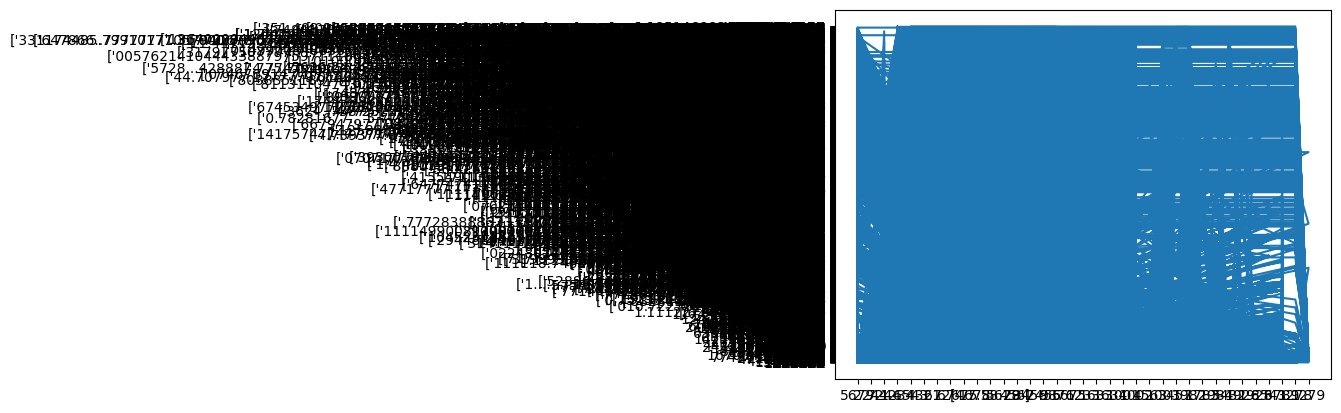

In [80]:
plt.plot(seen_data, mro_ssd)

In [8]:
# 
sipa2_data.loc[sipa2_data['image_file'] == "./sipaimages/2/1.jpg"]

,image_file,seen_data_numeric,size_used,closing_ssd,closing_eng,mro_ssd,mro_eng


In [9]:
sipa2_data['image_file'] == "./sipaimages/2/1.jpg"

0    False
0    False
0    False
0    False
0    False
     ...  
0    False
0    False
0    False
0    False
0    False
Name: image_file, Length: 57750, dtype: bool

In [10]:
(sipa2_data['image_file'].str.contains('./sipaimages/2/1.jpg')).any()

True

In [19]:
(sipa2_data['image_file'].str.contains('.\sipaimages\2\1.jpg')).any()

False

In [42]:
# adf = (sipa2_data.assign(aeq = sipa2_data['seen_data_numeric'] == sipa2_data['mro_ssd']).groupby(sipa2_data['image_file']).sum().reset_index(name = 'count'))
image_file_count_read_analysis = (sipa2_data.assign(aeq = sipa2_data['seen_data_numeric'] == sipa2_data['mro_ssd'])
.assign(qneq = sipa2_data['seen_data_numeric'] != sipa2_data['mro_ssd'])
.groupby(sipa2_data['image_file'])
.sum()
.reset_index())

In [39]:
print(image_file_count_read_analysis)

                    image_file  size_used  aeq  qneq
0     ['./sipaimages/2/1.jpg']      96075  303    47
1    ['./sipaimages/2/10.jpg']      96075  341     9
2    ['./sipaimages/2/11.jpg']      96075  344     6
3    ['./sipaimages/2/12.jpg']      96075  335    15
4    ['./sipaimages/2/13.jpg']      96075  302    48
..                         ...        ...  ...   ...
160   ['./sipaimages/2/5.jpg']      96075  307    43
161   ['./sipaimages/2/6.jpg']      96075    0   350
162   ['./sipaimages/2/7.jpg']      96075    0   350
163   ['./sipaimages/2/8.jpg']      96075  343     7
164   ['./sipaimages/2/9.jpg']      96075  349     1

[165 rows x 4 columns]


In [48]:
size_used_count_read_analysis = (sipa2_data.assign(aeq = sipa2_data['seen_data_numeric'] == sipa2_data['mro_ssd'])
.assign(qneq = sipa2_data['seen_data_numeric'] != sipa2_data['mro_ssd'])
.groupby(sipa2_data['size_used'])
.sum()
.reset_index())

ValueError: cannot insert size_used, already exists

In [43]:
size_used_count_read_analysis = sipa2_data.groupby('size_used')

In [47]:
size_used_count_read_analysis = sipa2_data.groupby('size_used').assign(aeq = sipa2_data['seen_data_numeric'] == sipa2_data['mro_ssd'])

AttributeError: 'DataFrameGroupBy' object has no attribute 'assign'

In [45]:
print(size_used_count_read_analysis)

In [11]:
size_array = sipa2_data['size_used'].unique()

In [12]:
type(size_array), size_array.shape

(numpy.ndarray, (350,))

In [13]:
print(size_array)

[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261
 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279
 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315
 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333
 334 335 336 337 338 339 340 341 342 343 344 345 34

In [14]:
ss = (sipa2_data.seen_data_numeric.eq(sipa2_data.mro_ssd)).value_counts()

In [15]:
ss

False    37062
True     20688
dtype: int64

In [16]:
tt = sipa2_data[sipa2_data['seen_data_numeric']==sipa2_data['mro_ssd']]

In [19]:
tt

,image_file,seen_data_numeric,size_used,closing_ssd,closing_eng,mro_ssd,mro_eng
0,['./sipaimages/2/1.jpg'],5679,100,44,NaN,5679,1
0,['./sipaimages/2/10.jpg'],2244,100,NaN,NaN,2244,2244
0,['./sipaimages/2/11.jpg'],2244,100,4,NaN,2244,NaN
0,['./sipaimages/2/12.jpg'],2244,100,NaN,NaN,2244,2
0,['./sipaimages/2/13.jpg'],7244,100,4,NaN,7244,24
...,...,...,...,...,...,...,...
0,['./sipaimages/2/42661_20220506144828.jpg'],1234,449,NaN,NaN,1234,34
0,['./sipaimages/2/42662_20220506145637.jpg'],1234,449,NaN,NaN,1234,NaN
0,['./sipaimages/2/5.jpg'],3456,449,NaN,NaN,3456,34
0,['./sipaimages/2/8.jpg'],1279,449,NaN,NaN,1279,2719


In [61]:
sipa2_data.shape

(57750, 7)

In [64]:
sipa2_data.describe()

,size_used
count,57750.000000
mean,274.500000
std,101.036759
min,100.000000
25%,187.000000
50%,274.500000
75%,362.000000
max,449.000000


In [18]:
type(sipa2_data['size_used']), type(sipa2_data['mro_ssd'])

(pandas.core.series.Series, pandas.core.series.Series)

In [12]:
size_fields_df = sipa2_data[['size_used', 'seen_data_numeric', 'mro_ssd', 'mro_eng']]

size_fields_df

,size_used,seen_data_numeric,mro_ssd,mro_eng
0,100,5679,5679,1
0,100,2244,2244,2244
0,100,2244,2244,NaN
0,100,2244,2244,2
0,100,7244,7244,24
...,...,...,...,...
0,449,3456,3456,34
0,449,6543,1166,NaN
0,449,1278,1.1851468836747448e+17,['27..']
0,449,1279,1279,2719


In [15]:
size_fields_df['size_used'] = pd.Series(size_fields_df['size_used'], dtype=pd.StringDtype)

TypeError: Expected an instance of StringDtype, but got the class instead. Try instantiating 'dtype'.

In [18]:
type(size_fields_df['size_used'])

pandas.core.series.Series

In [17]:
size_fields_df.size_used.apply(str)

0    100
0    100
0    100
0    100
0    100
    ... 
0    449
0    449
0    449
0    449
0    449
Name: size_used, Length: 57750, dtype: object

In [19]:
tt = size_fields_df.groupby('size_used').count()

In [20]:
tt

,seen_data_numeric,mro_ssd,mro_eng
size_used,,,
100,165,137,93
101,165,136,90
102,165,135,91
103,165,137,96
104,165,139,87
...,...,...,...
445,165,149,107
446,165,147,103
447,165,150,108


In [10]:
image_file_count_read_analysis = (size_fields_df.assign(aeq = size_fields_df['seen_data_numeric'] == size_fields_df['mro_ssd'])
.assign(qneq = size_fields_df['seen_data_numeric'] != size_fields_df['mro_ssd'])
.groupby(size_fields_df['size_used']).astype(str)
.sum()
.reset_index())

AttributeError: 'DataFrameGroupBy' object has no attribute 'astype'

In [21]:
size_fields_df

,size_used,seen_data_numeric,mro_ssd,mro_eng
0,100,5679,5679,1
0,100,2244,2244,2244
0,100,2244,2244,NaN
0,100,2244,2244,2
0,100,7244,7244,24
...,...,...,...,...
0,449,3456,3456,34
0,449,6543,1166,NaN
0,449,1278,1.1851468836747448e+17,['27..']
0,449,1279,1279,2719


In [41]:


# load the data into a dataframe
# df = pd.DataFrame({'size_used': [10, 10, 20, 20, 20],
#                    'seen_data': [1, 2, 1, 2, 3],
#                    'mro_ssd': [1, 2, 1, 3, 3],
#                    'mro_eng': [2, 2, 1, 3, 3]})


# size_fields_df
# group the data by the size_used field
grouped_data = size_fields_df.groupby('size_used')

# seen_data = size_fields_df['seen_data_numeric']

# count the number of times seen_data equals mro_ssd and does not equal mro_ssd
equal_mro_ssd = grouped_data['seen_data_numeric'].apply(lambda x: (x == grouped_data['mro_ssd']).sum())
not_equal_mro_ssd = grouped_data['seen_data_numeric'].apply(lambda x: (x != grouped_data['mro_ssd']).sum())

# do the same for mro_eng
equal_mro_eng = grouped_data['seen_data_numeric'].apply(lambda x: (x == grouped_data['mro_eng']).sum())
not_equal_mro_eng = grouped_data['seen_data_numeric'].apply(lambda x: (x != grouped_data['mro_eng']).sum())

# create a new dataframe with the results
# results_df = pd.DataFrame({'seen_data_numeric': seen_data,
#                            'equal_mro_ssd': equal_mro_ssd,
#                            'not_equal_mro_ssd': not_equal_mro_ssd,
#                            'equal_mro_eng': equal_mro_eng,
#                            'not_equal_mro_eng': not_equal_mro_eng})
results_df = pd.DataFrame({'equal_mro_ssd': equal_mro_ssd,
                           'not_equal_mro_ssd': not_equal_mro_ssd,
                           'equal_mro_eng': equal_mro_eng,
                           'not_equal_mro_eng': not_equal_mro_eng})

In [42]:
grouped_data.describe()


seen_data_numeric                   mro_ssd                    \
                      count unique   top freq   count unique   top freq   
size_used                                                                 
100                     165     35  1234   61     137     71  1234   29   
101                     165     35  1234   61     136     74  1234   29   
102                     165     35  1234   61     135     65  1234   32   
103                     165     35  1234   61     137     69  1234   30   
104                     165     35  1234   61     139     79  1234   27   
...                     ...    ...   ...  ...     ...    ...   ...  ...   
445                     165     35  1234   61     149     97  1234   22   
446                     165     35  1234   61     147     94  1234   20   
447                     165     35  1234   61     150     97  1234   22   
448                     165     35  1234   61     149    100  1234   19   
449                     165     35  1234   61     146     97  1234   23   

          mro_eng                     
            count unique    top freq  
size_used                             
100            93     38    234   15  
101            90     39    578   13  
102            91     39    234   14  
103            96     38    234   18  
104            87     39    234   15  
...           ...    ...    ...  ...  
445           107     54  ['.']   11  
446           103     55    618   10  
447           108     58    234   13  
448           110     57    234   11  
449           105     57    234   12  

[350 rows x 12 columns]

In [34]:
del grouped_data

In [37]:
results_df

,equal_mro_ssd,not_equal_mro_ssd,equal_mro_eng,not_equal_mro_eng
size_used,,,,
100,0,165,0,165
101,0,165,0,165
102,0,165,0,165
103,0,165,0,165
104,0,165,0,165
...,...,...,...,...
445,0,165,0,165
446,0,165,0,165
447,0,165,0,165


In [43]:
import pandas as pd

# load the data into a dataframe
df = pd.DataFrame({'size_used': [10, 10, 20, 20, 20],
                   'seen_data': [1, 2, 1, 2, 3],
                   'mro_ssd': [1, 2, 1, 3, 3],
                   'mro_eng': [2, 2, 1, 3, 3]})

# group the data by the size_used field
grouped_data = df.groupby('size_used')

# count the number of times seen_data equals mro_ssd and does not equal mro_ssd
equal_mro_ssd = grouped_data['seen_data'].apply(lambda x: (x == grouped_data['mro_ssd']).sum())
not_equal_mro_ssd = grouped_data['seen_data'].apply(lambda x: (x != grouped_data['mro_ssd']).sum())

# do the same for mro_eng
equal_mro_eng = grouped_data['seen_data'].apply(lambda x: (x == grouped_data['mro_eng']).sum())
not_equal_mro_eng = grouped_data['seen_data'].apply(lambda x: (x != grouped_data['mro_eng']).sum())

# create a new dataframe with the results
results_df = pd.DataFrame({'equal_mro_ssd': equal_mro_ssd,
                           'not_equal_mro_ssd': not_equal_mro_ssd,
                           'equal_mro_eng': equal_mro_eng,
                           'not_equal_mro_eng': not_equal_mro_eng})


c:\Users\USER\anaconda3\envs\py3-TF2\lib\site-packages\pandas\core\computation\expressions.py:69: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return op(a, b)


In [44]:
results_df

,equal_mro_ssd,not_equal_mro_ssd,equal_mro_eng,not_equal_mro_eng
size_used,,,,
10,0,2,0,2
20,0,3,0,3


In [46]:
import pandas as pd

# load the data into a dataframe
df = pd.DataFrame({'size_used': [10, 10, 20, 20, 20],
                   'seen_data': [1, 2, 1, 2, 3],
                   'mro_ssd': [1, 2, 1, 3, 3],
                   'mro_eng': [2, 2, 1, 3, 3]})

# group the data by the size_used field
grouped_data = df.groupby('size_used')

# count the number of times seen_data equals mro_ssd and does not equal mro_ssd
equal_mro_ssd = grouped_data['seen_data'].apply(lambda x: (x == x['mro_ssd']).sum())
not_equal_mro_ssd = grouped_data['seen_data'].apply(lambda x: (x != x['mro_ssd']).sum())

# do the same for mro_eng
equal_mro_eng = grouped_data['seen_data'].apply(lambda x: (x == x['mro_eng']).sum())
not_equal_mro_eng = grouped_data['seen_data'].apply(lambda x: (x != x['mro_eng']).sum())

# create a new dataframe with the results
results_df = pd.DataFrame({'equal_mro_ssd': equal_mro_ssd,
                           'not_equal_mro_ssd': not_equal_mro_ssd,
                           'equal_mro_eng': equal_mro_eng,
                           'not_equal_mro_eng': not_equal_mro_eng})


KeyError: 'mro_ssd'

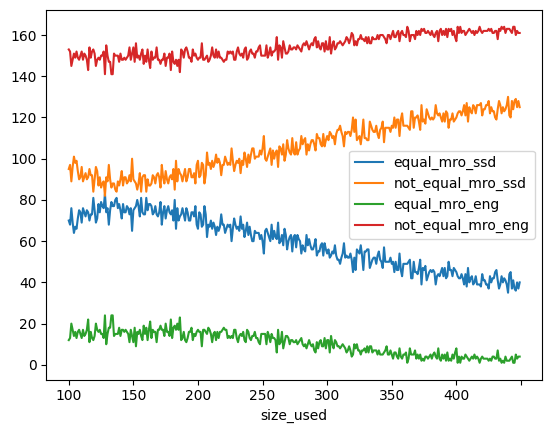

In [53]:
import pandas as pd

# load the data into a dataframe
df = pd.DataFrame({'size_used': [10, 10, 20, 20, 20],
                   'seen_data': [1, 2, 1, 2, 3],
                   'mro_ssd': [1, 2, 1, 3, 3],
                   'mro_eng': [2, 2, 1, 3, 3]})

# group the data by the size_used field
grouped_data = size_fields_df.groupby('size_used')

# count the number of times seen_data_numeric equals mro_ssd and does not equal mro_ssd
equal_mro_ssd = grouped_data['seen_data_numeric'].apply(lambda x: (x == grouped_data.get_group(x.name)['mro_ssd']).sum())
not_equal_mro_ssd = grouped_data['seen_data_numeric'].apply(lambda x: (x != grouped_data.get_group(x.name)['mro_ssd']).sum())

# do the same for mro_eng
equal_mro_eng = grouped_data['seen_data_numeric'].apply(lambda x: (x == grouped_data.get_group(x.name)['mro_eng']).sum())
not_equal_mro_eng = grouped_data['seen_data_numeric'].apply(lambda x: (x != grouped_data.get_group(x.name)['mro_eng']).sum())

# create a new dataframe with the results
results_df = pd.DataFrame({'equal_mro_ssd': equal_mro_ssd,
                           'not_equal_mro_ssd': not_equal_mro_ssd,
                           'equal_mro_eng': equal_mro_eng,
                           'not_equal_mro_eng': not_equal_mro_eng})

results_df.plot()
plt.show()

In [50]:
results_df

,equal_mro_ssd,not_equal_mro_ssd,equal_mro_eng,not_equal_mro_eng
size_used,,,,
100,70,95,12,153
101,68,97,13,152
102,76,89,20,145
103,69,96,17,148
104,64,101,14,151
...,...,...,...,...
445,37,128,1,164
446,36,129,5,160
447,40,125,3,162


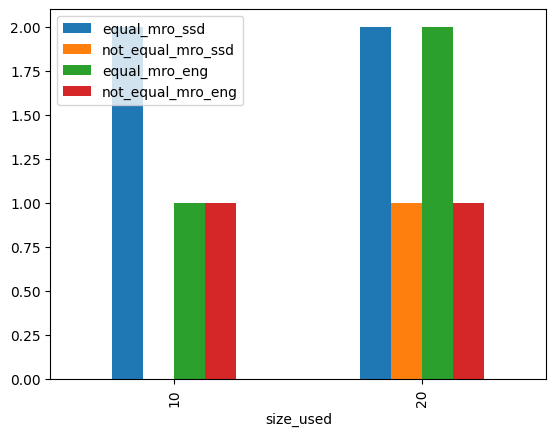

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data into a dataframe
df = pd.DataFrame({'size_used': [10, 10, 20, 20, 20],
                   'seen_data': [1, 2, 1, 2, 3],
                   'mro_ssd': [1, 2, 1, 3, 3],
                   'mro_eng': [2, 2, 1, 3, 3]})

# group the data by the size_used field
grouped_data = df.groupby('size_used')

# count the number of times seen_data equals mro_ssd and does not equal mro_ssd
equal_mro_ssd = grouped_data['seen_data'].apply(lambda x: (x == grouped_data.get_group(x.name)['mro_ssd']).sum())
not_equal_mro_ssd = grouped_data['seen_data'].apply(lambda x: (x != grouped_data.get_group(x.name)['mro_ssd']).sum())

# do the same for mro_eng
equal_mro_eng = grouped_data['seen_data'].apply(lambda x: (x == grouped_data.get_group(x.name)['mro_eng']).sum())
not_equal_mro_eng = grouped_data['seen_data'].apply(lambda x: (x != grouped_data.get_group(x.name)['mro_eng']).sum())

# create a new dataframe with the results
results_df = pd.DataFrame({'equal_mro_ssd': equal_mro_ssd,
                           'not_equal_mro_ssd': not_equal_mro_ssd,
                           'equal_mro_eng': equal_mro_eng,
                           'not_equal_mro_eng': not_equal_mro_eng})

# create a bar plot of the results
results_df.plot(kind='bar')

# show the plot
plt.show()
